In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# install thrid party lib which not include on colab
!pip3 install split-folders
!pip install torchinfo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import necessery package
import os
import sys
import time
# from torchvision import transforms

In [ ]:
# change to project path
eff_project_path = './drive/MyDrive/dl/efficientNet'
os.chdir(eff_project_path)
os.getcwd()

'/content/drive/MyDrive/dl/efficientNet'

In [ ]:
# add my module to sys.path so it can be imported by current notebook
sys.path.insert(0, './src')
sys.path

['./src',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
import torch
import Model
import utils
from Controller import Controller
from EarlyStopping import EarlyStopping
from CheckPoint import CheckPoint
from Plotting import Plotting
import Config

In [ ]:
# aksara_sunda_path = './data/aksara_sunda'
# # copy data to ./data/splitted/aksara_sunda/80_20
# utils.split_image_folder(path=aksara_sunda_path, target_path='./data/splitted/aksara_sunda/', ratio='80/20')
# print(f"created train loader at : {train_loader}")
# print(f"created test loader at : {test_loader}")
# print(f"labels : {', '.join(classes)}")

# PREPARING THE DATA

In [ ]:
cnf = Config.load_config('./config/config.json')

In [ ]:
auto_transform = utils.get_EfficientNet_transform()
train_loader, test_loader, classes = utils.create_data_loader(test_path='./data/splitted/aksara_sunda/60_40/test',
                         train_path='./data/splitted/aksara_sunda/60_40/train',
                         transform_func=auto_transform,
                         batch_size=cnf.BATCH_SIZE,
                         num_workers=2)

In [ ]:
# check if gpu available
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# PREPARING THE WORKER

In [ ]:
cp = CheckPoint()
ea = EarlyStopping(cnf=cnf, load_best_when_stop=cnf.LOAD_BEST, patience=cnf.PATIENCE, max_counter=cnf.ES_EPOCHS)
model = Model.CustomEfficientNet(num_of_class=cnf.NUM_OF_CLASS, drop_out=cnf.DROP_OUT, device=device)
optimizer = torch.optim.NAdam(model.parameters(), lr=cnf.LEARNING_RATE, weight_decay=cnf.WEIGHT_DECAY)
loss_fn = torch.nn.CrossEntropyLoss()
plotting = Plotting(cnf.PLOT_EVERY)

In [ ]:
# model.unfreeze()
# utils.get_summary(model=model, batch_size=cnf.BATCH_SIZE, output_size=cnf.NUM_OF_CLASS)


# PREPARING THE CONTROLLER

In [ ]:
ctr = Controller(model=model, 
                 test_loader=test_loader,
                 train_loader=train_loader,
                 criterion=loss_fn,
                 optimizer=optimizer,
                 check_point = cp,
                 config = cnf,
                 early_stopping = ea,
                 plotting=plotting, 
                 epochs=cnf.EPOCHS,
                 device=device)

# ADAPTATION PHASE

Epoch: 1/15 | test_acc: 0.7250    | test_cost: 0.0160    | train_acc: 0.5810    | train_cost: 0.0250  
Epoch: 2/15 | test_acc: 0.8570 ⬆  | test_cost: 0.0080 ⬇  | train_acc: 0.7900 ⬆  | train_cost: 0.0130 ⬇ 
Epoch: 3/15 | test_acc: 0.8790 ⬆  | test_cost: 0.0070 ⬇  | train_acc: 0.8190 ⬆  | train_cost: 0.0100 ⬇ 
Epoch: 4/15 | test_acc: 0.8750 ⬇  | test_cost: 0.0060 ⬇  | train_acc: 0.8320 ⬆  | train_cost: 0.0090 ⬇ 
EarlyStop Patience: 1 | best test_acc: 0.8790
Epoch: 5/15 | test_acc: 0.8930 ⬆  | test_cost: 0.0050 ⬇  | train_acc: 0.8430 ⬆  | train_cost: 0.0080 ⬇ 
Model improve, EarlyStop patience reset to 0
Epoch: 6/15 | test_acc: 0.8990 ⬆  | test_cost: 0.0050    | train_acc: 0.8470 ⬆  | train_cost: 0.0080   
Epoch: 7/15 | test_acc: 0.9020 ⬆  | test_cost: 0.0050    | train_acc: 0.8590 ⬆  | train_cost: 0.0070 ⬇ 
Epoch: 8/15 | test_acc: 0.9050 ⬆  | test_cost: 0.0050    | train_acc: 0.8620 ⬆  | train_cost: 0.0070   
Epoch: 9/15 | test_acc: 0.9190 ⬆  | test_cost: 0.0040 ⬇  | train_acc: 0.8750 ⬆

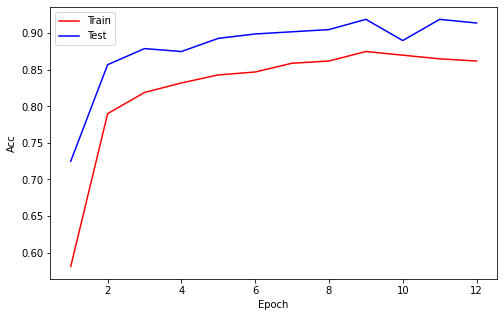

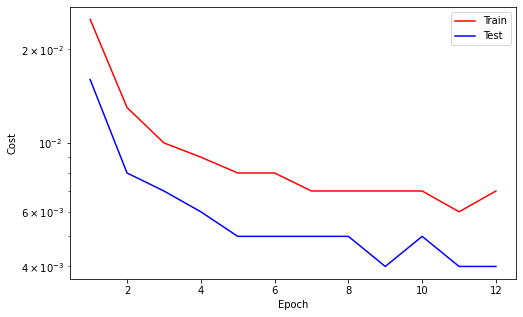

running time: 416.6670 seconds


In [ ]:
start = time.time()

(ctr
.adaptation()
.with_early_stopping() 
.run())

# (ctr
#  .adaptation()
#  .with_epoch()
#  .run())

print(f'running time: {(time.time() - start):.4f} seconds')

# FINE TUNNING

Epoch: 1/100 | test_acc: 0.9170    | test_cost: 0.0040    | train_acc: 0.8820    | train_cost: 0.0060  
Model improve, EarlyStop patience reset to 0
Epoch: 2/100 | test_acc: 0.9340 ⬆  | test_cost: 0.0030 ⬇  | train_acc: 0.8920 ⬆  | train_cost: 0.0060   
Epoch: 3/100 | test_acc: 0.9340    | test_cost: 0.0030    | train_acc: 0.9030 ⬆  | train_cost: 0.0050 ⬇ 
EarlyStop Patience: 1 | best test_acc: 0.9340
Epoch: 4/100 | test_acc: 0.9430 ⬆  | test_cost: 0.0030    | train_acc: 0.9200 ⬆  | train_cost: 0.0040 ⬇ 
Model improve, EarlyStop patience reset to 0
Epoch: 5/100 | test_acc: 0.9440 ⬆  | test_cost: 0.0030    | train_acc: 0.9210 ⬆  | train_cost: 0.0040   
Epoch: 6/100 | test_acc: 0.9490 ⬆  | test_cost: 0.0030    | train_acc: 0.9260 ⬆  | train_cost: 0.0040   
Epoch: 7/100 | test_acc: 0.9490    | test_cost: 0.0020 ⬇  | train_acc: 0.9270 ⬆  | train_cost: 0.0040   
EarlyStop Patience: 1 | best test_acc: 0.9490
Epoch: 8/100 | test_acc: 0.9520 ⬆  | test_cost: 0.0020    | train_acc: 0.9330 ⬆  | t

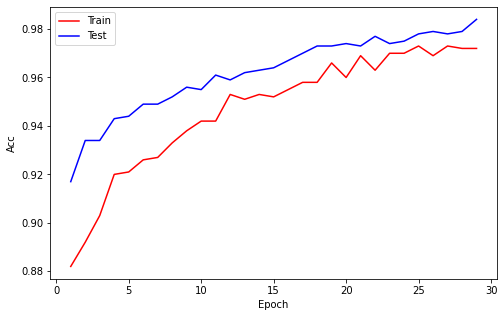

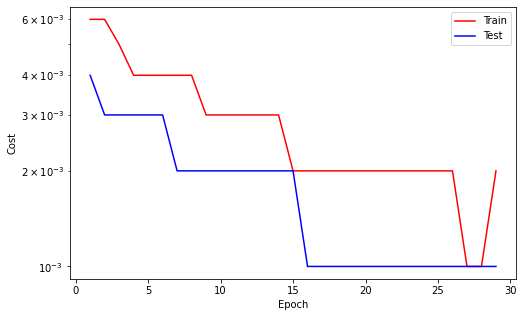

running time: 1144.1707 seconds


In [ ]:
start = time.time()
cp.reset()
ea.set_patience(6)
plotting.reset_tick() 
# ctr.max_epochs = 100
ctr.es.max_counter = 100
ctr.optimizer = torch.optim.NAdam(ctr.model.parameters(), lr=5e-6, weight_decay=1e-5)

(ctr
.fine_tunning()
.with_early_stopping()
.run())
# ctr.model.model.to(torch.device('cpu'))
# ctr.device = torch.device('cpu')

# (ctr
#  .fine_tunning()
#  .with_epoch()
#  .run())

print(f'running time: {(time.time() - start):.4f} seconds')